In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = 'http://www.popvortex.com/music/netherlands/top-songs.php'

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
soup.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8')

[<div class="chart-content col-xs-12 col-sm-8"><p class="title-artist"><cite class="title">Easy On Me</cite><em class="artist">Adele</em></p><ul><li><strong>Genre</strong>: Pop</li><li><strong>Release Date</strong>: 15-10-2021</li><li class="billboard-chart">Former #1 song on the <cite>Billboard Hot 100</cite> chart.</li></ul><a aria-label="Stream Easy On Me - Adele on Apple Music" class="buy-button button" href="https://music.apple.com/nl/album/easy-on-me/1590035691?i=1590036021&amp;uo=2&amp;partnerId=11&amp;at=10l4UI&amp;app=music&amp;ct=music-songs" rel="nofollow noopener">Listen on Apple Music</a> <a aria-label="Buy Easy On Me - Adele on iTunes" class="buy-button button" href="https://music.apple.com/nl/album/easy-on-me/1590035691?i=1590036021&amp;uo=2&amp;partnerId=11&amp;at=10l4UI&amp;app=itunes&amp;ct=music-songs" rel="nofollow noopener">Buy on iTunes</a> <a aria-label="Buy Easy On Me - Adele on Amazon" class="amazon-buy button" href="https://www.amazon.com/gp/search?ie=UTF8&amp

In [6]:
soup.cite.get_text()

'Easy On Me'

In [7]:
soup.em.get_text()

'Adele'

In [8]:
soup.select('cite.title')[0]

<cite class="title">Easy On Me</cite>

In [9]:
soup.select('cite.title')[0].get_text()

'Easy On Me'

In [10]:
soup.select('em.artist')[0]

<em class="artist">Adele</em>

In [11]:
title = []
artist = []

num_iter = len(soup.select('cite.title'))

for i in range(num_iter):
    title.append(soup.select('cite.title')[i].get_text())
    artist.append(soup.select('em.artist')[i].get_text())
    
print(title)
print(artist)

# each list becomes a column
songs = pd.DataFrame({"title":title,
                       "artist":artist,
                      })


['Easy On Me', 'Neem Er Één Van Mij', 'Do It To It (feat. Cherish)', 'Dat Heb Jij Gedaan', 'Schiddi Widdi Witt', 'Cold Heart (PNAU Remix)', 'Ons Moeder Zeej Nog', 'Mañana', 'Everybody Needs Somebody To Love', 'Alle Remmen Los', 'Only You', 'Misschien Huil Ik Niet Hard Genoeg', 'Better Days', 'Moth To A Flame', 'Baby Lekker Ding', 'Hold On', "Tot Over M'n Oren", 'I Drink Wine', "Non Stop Vol D'r Op", 'The Motto', 'Overpass Graffiti', 'Ja Wie Niet Springt (Die Moet Betalen)', 'Hold Me', 'Skyfall', 'Pepas', 'Thunder', 'Amsterdam', 'Hard To Say Goodbye', 'Love Is A Game', 'Streken Van Een Duivel (feat. Frenna)', 'Rolling In the Deep', 'Nothing Else Matters', 'Three Little Birds', "Don't Look Back in Anger", 'To Be Loved', 'Nooit Meer Alcohol', 'Wij Gaan Door', 'Dopamine (feat. Eyelar)', 'Vrijmibo', 'Can I Get It', 'In De Nacht', 'Hello', 'Set Fire to the Rain', 'Bohemian Rhapsody', 'Pastorale', 'Happy Birthday', 'Santa Tell Me', 'Tears In Heaven', 'In the End', 'Stairway to Heaven', 'Water

In [12]:
url = 'http://www.popvortex.com/charts/australia.php'
# top 100 songs in Australia

In [13]:
response1 = requests.get(url)
response1.status_code

200

In [14]:
spoon = BeautifulSoup(response1.content, "html.parser")
spoon.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8')

[]

In [15]:
title1 = []
artist1 = []

num_iter = len(spoon.select('cite.title'))

for i in range(num_iter):
    title1.append(spoon.select('cite.title')[i].get_text())
    artist1.append(spoon.select('em.artist')[i].get_text())
    
print(title1)
print(artist1)

# each list becomes a column
songs1 = pd.DataFrame({"title":title1,
                       "artist":artist1,
                      })

[]
[]


In [16]:
songs1.head(5)

,title,artist


In [17]:
top_songs = pd.concat([songs, songs1], axis=0).reset_index()
top_songs

,index,title,artist
0,0,Easy On Me,Adele
1,1,Neem Er Één Van Mij,Mart Hoogkamer
2,2,Do It To It (feat. Cherish),Acraze
3,3,Dat Heb Jij Gedaan,MEAU
4,4,Schiddi Widdi Witt,Gino Graus
...,...,...,...
95,95,presents (feat. Kiana Ledé),Bryson Tiller
96,96,Proloog (feat. Danny Talany),NeighbUrs
97,97,So Much To Say,Aaron Carter
98,98,Ghetto Gemälde,Anonym & Samra


In [18]:
top_songs = top_songs.drop(['index'], axis=1)

In [19]:
top_songs

,title,artist
0,Easy On Me,Adele
1,Neem Er Één Van Mij,Mart Hoogkamer
2,Do It To It (feat. Cherish),Acraze
3,Dat Heb Jij Gedaan,MEAU
4,Schiddi Widdi Witt,Gino Graus
...,...,...
95,presents (feat. Kiana Ledé),Bryson Tiller
96,Proloog (feat. Danny Talany),NeighbUrs
97,So Much To Say,Aaron Carter
98,Ghetto Gemälde,Anonym & Samra


In [20]:
from random import randint

def songs (data=top_songs):
    song =  str(input("search songs or artist you are intrested: "))
    for i in range(len(top_songs)):
        # if it is a song and it's in our list, then recommend another song from the list
        if top_songs['title'][i] == song:
            rand_number = randint(0,len(top_songs))
            return(print("I would recommend you to listen to: \"", top_songs['title'][rand_number], "\" by", top_songs['artist'][rand_number]))
        # if it is an artist and it's in our list, then recommend another song from the list
        elif top_songs['artist'][i] == song:
            rand_number = randint(0,len(top_songs))
            return(print("I would recommend you to listen to: \"", top_songs['title'][rand_number], "\" by", top_songs['artist'][rand_number]))
    return ("Not in the list")
songs()

search songs or artist you are intrested: Adele
I would recommend you to listen to: " So Much To Say " by Aaron Carter


In [21]:
#import spotipy
#from spotipy.oauth2 import SpotifyClientCredentials
#Initialize SpotiPy with user credentials
#sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='<your client id here>',
#                                                           client_secret='<your client secret here>'))


In [22]:
playlist = sp.user_playlist_tracks("spotify", "0BUNSGihi2mrhQu3fPcVim")

In [23]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [24]:
playlist["items"][0]["track"]["name"]

'Rainbow Connection'

In [25]:
playlist['total']

813

In [26]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [27]:
all_tracks = get_playlist_tracks("0BUNSGihi2mrhQu3fPcVim")
len(all_tracks)

813

In [28]:
def uri(all_tracks):
    uri=[all_tracks[i]['track']['uri'] for i in range(len(all_tracks))]
    return uri
all_uri = uri(all_tracks)

In [29]:
complete_all_uri = pd.DataFrame(all_uri, columns=['uri'])

In [30]:
complete_all_uri.shape

(813, 1)

In [31]:
def artists(all_tracks):
    uri=[all_tracks[i]['track']['artists'][0]['name'] for i in range(len(all_tracks))]
    return artist
all_artists = artists(all_tracks)

In [32]:
complete_all_artists= pd.DataFrame(all_artists, columns=['artist'])
# complete_all_artists

In [33]:
def track_names(all_tracks):
    names=[all_tracks[i]['track']['name'] for i in range(len(all_tracks))]
    return names
all_track_names = track_names(all_tracks)

In [34]:
complete_track_names= pd.DataFrame(all_track_names, columns=['album'])

In [35]:
audio_features = [sp.audio_features(i) for i in (all_uri)]

In [36]:
def flatten(input_list):
  return [item for sublist in input_list for item in sublist]

In [37]:
features_new = flatten(audio_features)

In [38]:
danceability = [features_new[i]['danceability'] for i in range(len(features_new))]
energy = [features_new[i]['energy'] for i in range(len(features_new))]
key = [features_new[i]['key'] for i in range(len(features_new))]
loudness = [features_new[i]['loudness'] for i in range(len(features_new))]
mode = [features_new[i]['mode'] for i in range(len(features_new))]
speechiness = [features_new[i]['speechiness'] for i in range(len(features_new))]
acousticness = [features_new[i]['acousticness'] for i in range(len(features_new))]
instrumentalness = [features_new[i]['instrumentalness'] for i in range(len(features_new))]
liveness = [features_new[i]['liveness'] for i in range(len(features_new))]
valence = [features_new[i]['valence'] for i in range(len(features_new))]
tempo = [features_new[i]['tempo'] for i in range(len(features_new))]

In [39]:
complete_features = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo})
# complete_features

In [40]:
all_top_songs =pd.concat([complete_track_names,complete_all_artists,complete_all_uri,complete_features], axis=1)
all_top_songs

,album,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Rainbow Connection,Adele,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,Somewhere Over The Rainbow_What A Wonderful World,Mart Hoogkamer,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,What a Wonderful World,Acraze,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,One Day / Reckoning Song (Wankelmut Remix) [Ra...,MEAU,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,What A Wonderful World - Single Version,Gino Graus,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,Cold Heart - PNAU Remix,NaN,spotify:track:6zSpb8dQRaw0M1dK8PBwQz,0.796,0.798,1,-6.312,1,0.0317,0.03400,0.000042,0.0952,0.942,116.032
809,Everything That I Want,NaN,spotify:track:1A2rlbdSXZWyPXkEm3AXK5,0.635,0.516,3,-8.677,1,0.0341,0.12500,0.000000,0.1200,0.127,114.074
810,The Loophole,NaN,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768
811,Major Tom (Coming Home) - Adam K & Soha Radio ...,NaN,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [44]:
cluster=all_top_songs.drop(['artist','album','uri'],axis=1)

In [45]:
scaler=StandardScaler().fit(cluster)
X_prep=scaler.transform(cluster)

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [47]:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    486
1    286
2     41
dtype: int64

In [48]:
clusters

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

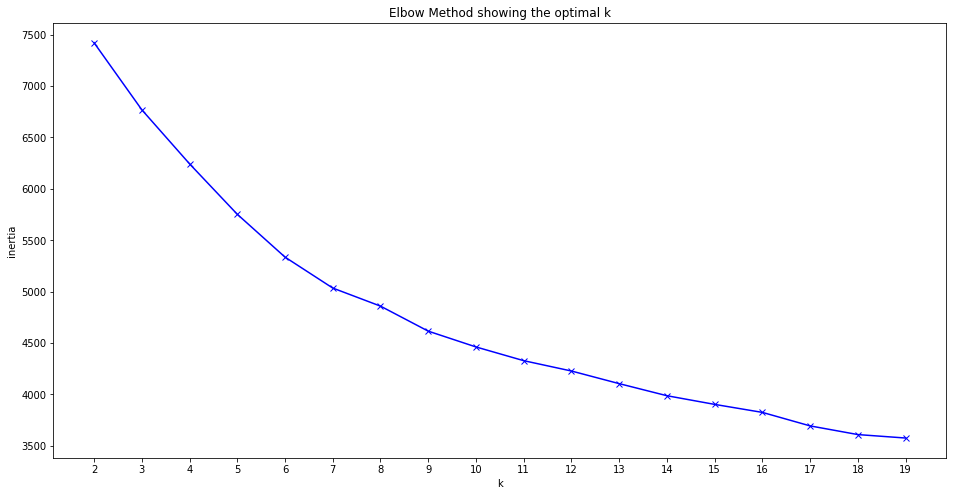

In [49]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

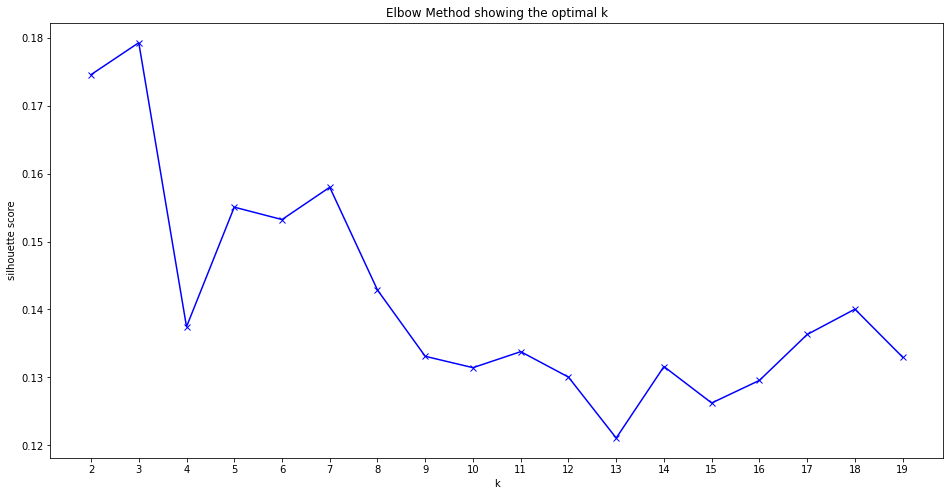

In [50]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [51]:
from sklearn import cluster

In [52]:
X_prep

array([[-0.14448912, -0.95226344,  1.1193953 , ..., -0.39596108,
        -1.17030975, -0.2607122 ],
       [ 0.73637736, -2.0075736 , -1.44658697, ...,  1.05831626,
         0.71252602, -1.30986901],
       [-0.81317608,  1.05067216, -0.02104126, ...,  0.06816999,
        -0.0212558 , -1.34246542],
       ...,
       [ 0.13198722, -1.15040331, -0.02104126, ...,  0.90979432,
         1.29713242,  1.56522972],
       [ 1.18002544,  0.55962989,  1.40450444, ...,  0.8169681 ,
         0.7407484 ,  0.28481136],
       [-1.54615987, -1.11163681, -0.30615041, ..., -0.14842451,
        -1.38399347,  2.11740145]])

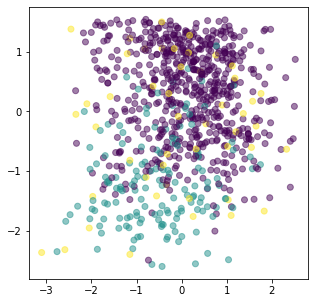

In [53]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
#plt.scatter(X['alcohol'], X['malic_acid'], c=pred,alpha=0.5)
plt.show()

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

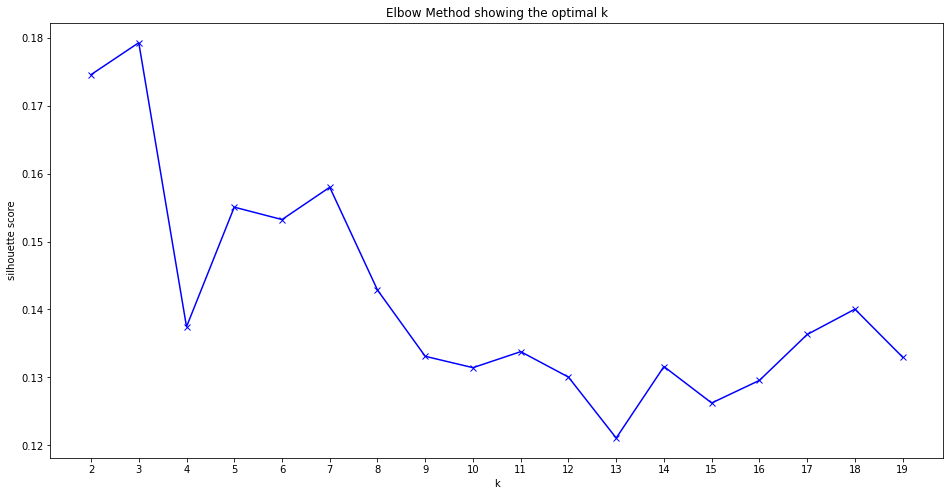

In [54]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [55]:
from sklearn import cluster

In [56]:
X_prep # back to our generated blobs

array([[-0.14448912, -0.95226344,  1.1193953 , ..., -0.39596108,
        -1.17030975, -0.2607122 ],
       [ 0.73637736, -2.0075736 , -1.44658697, ...,  1.05831626,
         0.71252602, -1.30986901],
       [-0.81317608,  1.05067216, -0.02104126, ...,  0.06816999,
        -0.0212558 , -1.34246542],
       ...,
       [ 0.13198722, -1.15040331, -0.02104126, ...,  0.90979432,
         1.29713242,  1.56522972],
       [ 1.18002544,  0.55962989,  1.40450444, ...,  0.8169681 ,
         0.7407484 ,  0.28481136],
       [-1.54615987, -1.11163681, -0.30615041, ..., -0.14842451,
        -1.38399347,  2.11740145]])

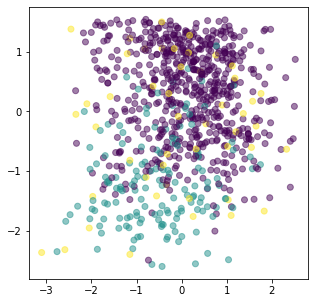

In [57]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
#plt.scatter(X['alcohol'], X['malic_acid'], c=pred,alpha=0.5)
plt.show()

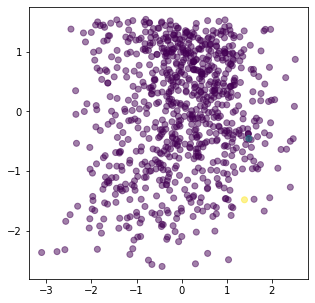

In [58]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='single')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

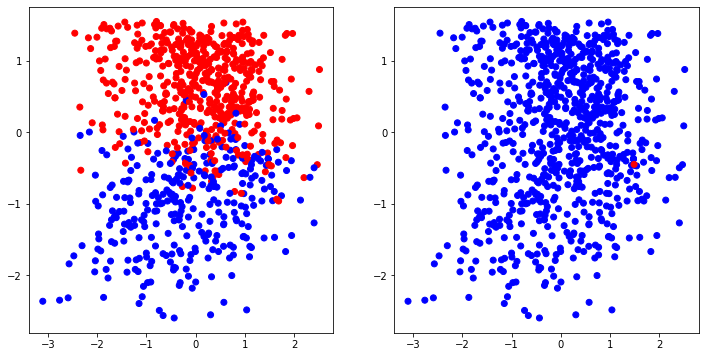

In [59]:
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
X = StandardScaler().fit_transform(X)

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X_prep)
y1_pred = kmeans.predict(X_prep)


single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X_prep)


options, charts = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
charts[0].scatter(X_prep[:, 0], X_prep[:, 1], color=colors[y1_pred])
charts[1].scatter(X_prep[:, 0], X_prep[:, 1], color=colors[y2_pred])
plt.show()